# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#### Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [3]:
#units = "imperial"

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

#### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}&appid={weather_api_key}&q={city_data}&units={units}"
    city_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units=imperial"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | big bend
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | dompu
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | fort mcmurray
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | ushtobe
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | taoudenni
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | bodo
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | kerikeri
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | isla vista
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | puerto deseado
Processing Recor

Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | saipan
Processing Record 41 of Set 4 | felidhoo
City not found. Skipping...
Processing Record 42 of Set 4 | taman'
Processing Record 43 of Set 4 | akureyri
Processing Record 44 of Set 4 | guanica
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | necochea
Processing Record 47 of Set 4 | ust-nera
Processing Record 48 of Set 4 | jiaojiang
Processing Record 49 of Set 4 | esil
Processing Record 0 of Set 5 | new norfolk
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | saint-francois
Processing Record 3 of Set 5 | conceicao das alagoas
Processing Record 4 of Set 5 | blagoveshchenka
Processing Record 5 of Set 5 | cestos city
Processing Record 6 of Set 5 | blenheim
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | verdal
Processing Record 9 of Set 5 | la passe
Processing Record 10 of Set 5 | sao joao da barra
Processing R

Processing Record 29 of Set 8 | inhambane
Processing Record 30 of Set 8 | tangalle
Processing Record 31 of Set 8 | kalach-na-donu
Processing Record 32 of Set 8 | ko pha ngan
Processing Record 33 of Set 8 | fort st. john
Processing Record 34 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 35 of Set 8 | ijuw
City not found. Skipping...
Processing Record 36 of Set 8 | sadjoavato
City not found. Skipping...
Processing Record 37 of Set 8 | sretensk
Processing Record 38 of Set 8 | ypsonas
Processing Record 39 of Set 8 | jahazpur
Processing Record 40 of Set 8 | kuala belait
Processing Record 41 of Set 8 | coari
Processing Record 42 of Set 8 | aioun
Processing Record 43 of Set 8 | kone
Processing Record 44 of Set 8 | maevatanana
City not found. Skipping...
Processing Record 45 of Set 8 | ad dabbah
Processing Record 46 of Set 8 | at taj
Processing Record 47 of Set 8 | kununurra
Processing Record 48 of Set 8 | shahrak-e emam hasan
City not found. Skipping...
Processing Record 

Processing Record 14 of Set 12 | kutum
Processing Record 15 of Set 12 | al qadarif
Processing Record 16 of Set 12 | zhezqazghan
Processing Record 17 of Set 12 | illizi
Processing Record 18 of Set 12 | nuzvid
Processing Record 19 of Set 12 | yagry
City not found. Skipping...
Processing Record 20 of Set 12 | khvoynaya
Processing Record 21 of Set 12 | tranovaho
City not found. Skipping...
Processing Record 22 of Set 12 | whangarei
Processing Record 23 of Set 12 | katsuura
Processing Record 24 of Set 12 | kalmunai
Processing Record 25 of Set 12 | laojunmiao
Processing Record 26 of Set 12 | mombasa
Processing Record 27 of Set 12 | aasiaat
Processing Record 28 of Set 12 | ukmerge
Processing Record 29 of Set 12 | tual
Processing Record 30 of Set 12 | xichang
Processing Record 31 of Set 12 | papao
Processing Record 32 of Set 12 | dzhalagash
Processing Record 33 of Set 12 | tazovsky
Processing Record 34 of Set 12 | fisterra
Processing Record 35 of Set 12 | bikenibeu village
Processing Record 36

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count() 

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,60.82,84,8,5.01,NZ,1699935855
1,big bend,-26.8167,31.9333,62.69,94,100,2.30,SZ,1699935856
2,longyearbyen,78.2186,15.6401,12.04,73,40,5.75,SJ,1699935856
3,talnakh,69.4865,88.3972,-6.86,96,40,6.13,RU,1699935856
4,chonchi,-42.6128,-73.8092,38.41,92,79,3.33,CL,1699935858


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,60.82,84,8,5.01,NZ,1699935855
1,big bend,-26.8167,31.9333,62.69,94,100,2.30,SZ,1699935856
2,longyearbyen,78.2186,15.6401,12.04,73,40,5.75,SJ,1699935856
3,talnakh,69.4865,88.3972,-6.86,96,40,6.13,RU,1699935856
4,chonchi,-42.6128,-73.8092,38.41,92,79,3.33,CL,1699935858


### Create the Scatter Plots Requested

##### Latitude Vs. Temperature

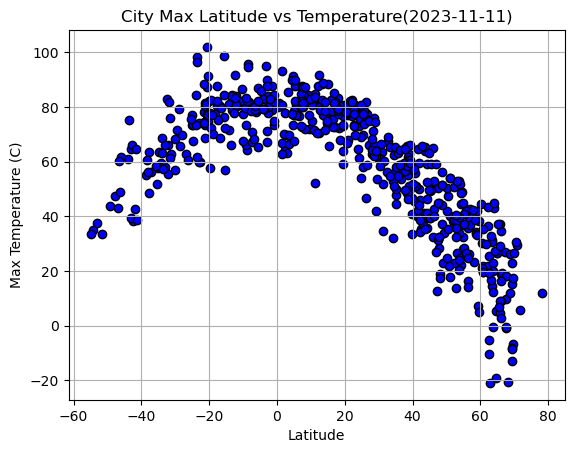

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
             city_data_df["Max Temp"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature(2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

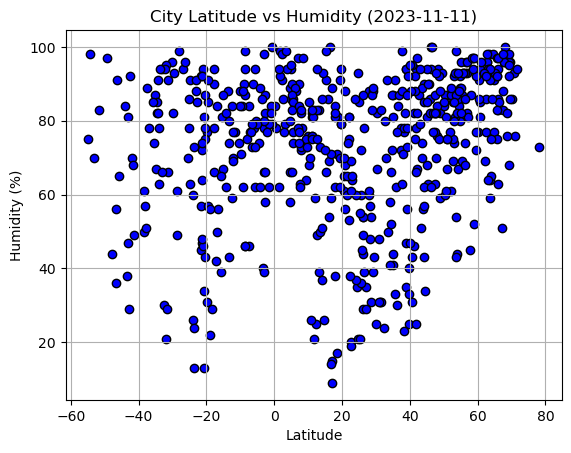

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

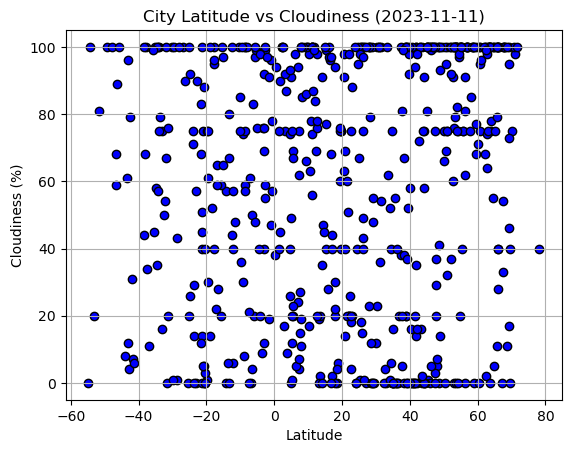

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

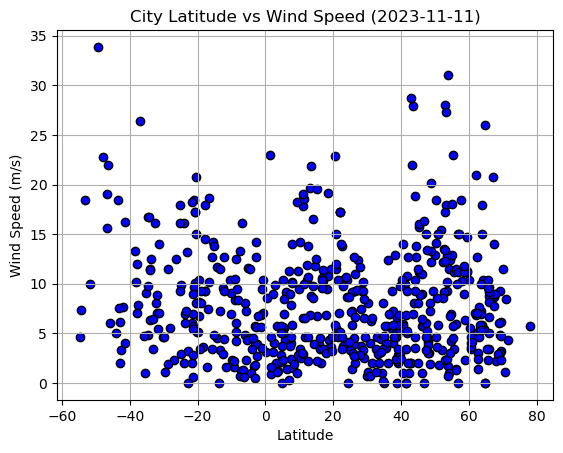

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-11-11)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [13]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, ylabel):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values,y_values, color="blue")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()    


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,longyearbyen,78.2186,15.6401,12.04,73,40,5.75,SJ,1699935856
3,talnakh,69.4865,88.3972,-6.86,96,40,6.13,RU,1699935856
7,lerwick,60.1545,-1.1494,44.37,77,71,10.36,GB,1699935859
8,fort mcmurray,56.7268,-111.3810,26.19,93,100,0.00,CA,1699935859
10,ushtobe,45.2514,77.9838,39.51,63,1,11.14,KZ,1699935860


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,60.82,84,8,5.01,NZ,1699935855
1,big bend,-26.8167,31.9333,62.69,94,100,2.30,SZ,1699935856
4,chonchi,-42.6128,-73.8092,38.41,92,79,3.33,CL,1699935858
5,bredasdorp,-34.5322,20.0403,58.75,82,35,16.71,ZA,1699935858
6,dompu,-8.5356,118.4622,95.54,46,59,5.10,ID,1699935859


### Temperature vs. Latitude Regression Plot

The r-squared is: 0.7849814422348884


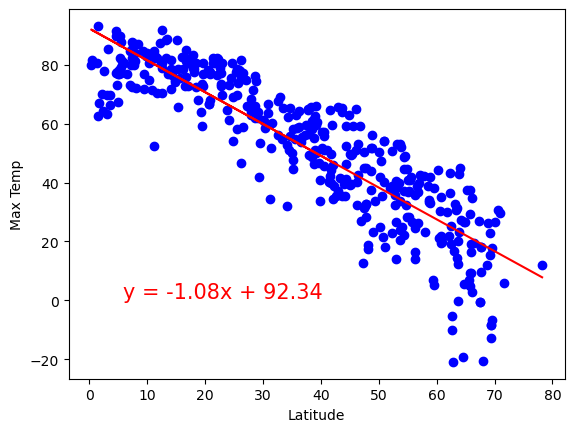

In [16]:
# Linear regression on Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Max Temp"]
yl = "Max Temp"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.5249636355695069


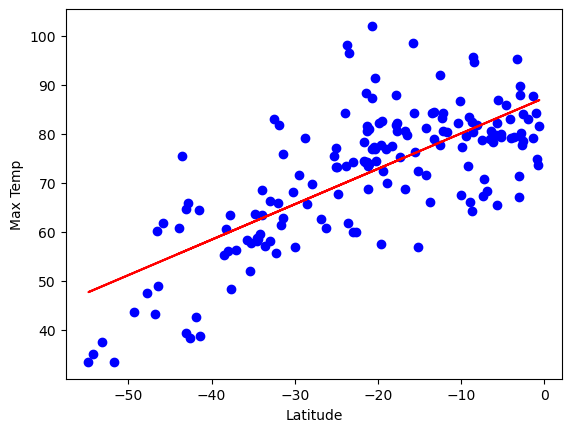

In [17]:
# Linear regression on Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Max Temp"]
yl = "Max Temp"
linear_regression_plot(x_southern, y_southern, yl)

#### Relationship between Temperature and Latitude:
There's a negative correlation between temperature and latitude in the northern hemisphere. 
There's a positive correlation between temperature and latitude in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot     

The r-squared is: 0.06059559173536851


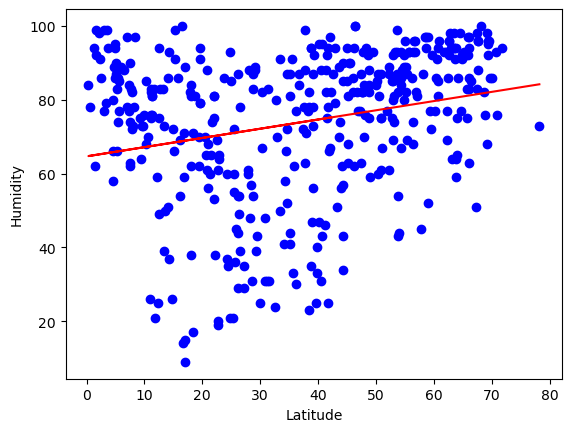

In [18]:
# Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Humidity"]
yl = "Humidity"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.007419934865938545


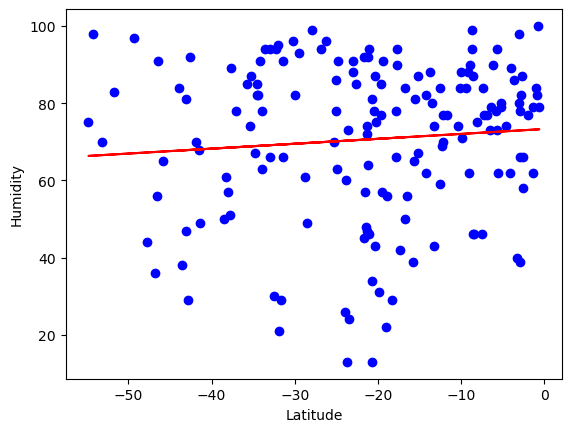

In [19]:
# Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Humidity"]
yl = "Humidity"
linear_regression_plot(x_southern, y_southern, yl)

#### Relationship between Humidity and Latitude:
There's a positive correlation between humidity and latitude in both the northern & southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.029412008511117332


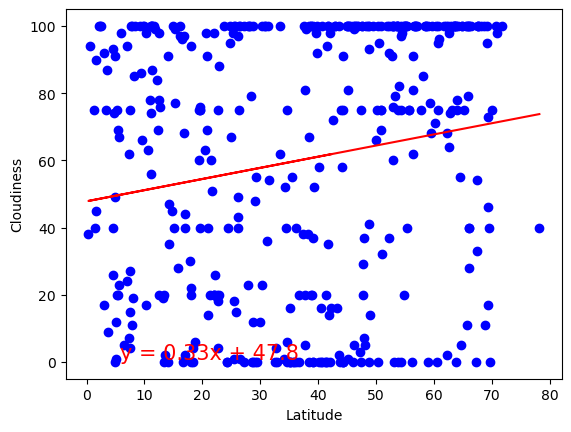

In [20]:
# Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Cloudiness"]
yl = "Cloudiness"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.00017680127155264986


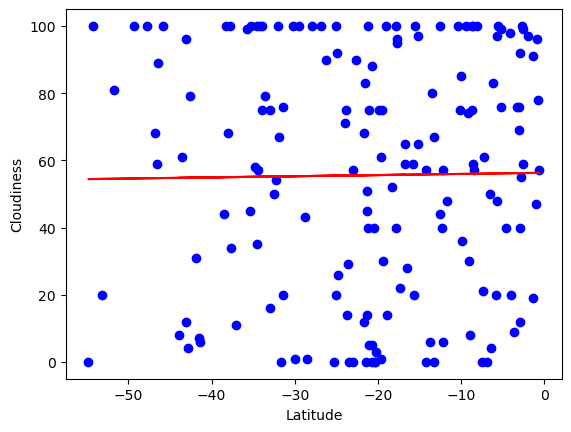

In [21]:
# Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Cloudiness"]
yl = "Cloudiness"
linear_regression_plot(x_southern, y_southern, yl)

#### Relationship between Cloudiness and Latitude:
There's a weak correlation between cloudiness and latitude in both the northern and southern hemisphere.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.006107378123125886


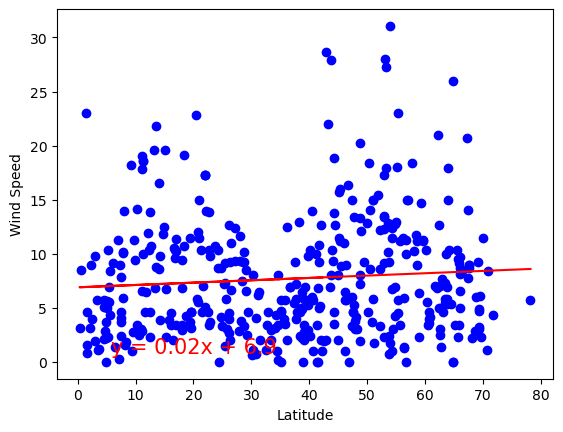

In [22]:
# Northern Hemisphere
x_northern = northern_hemi_df["Lat"]
y_northern = northern_hemi_df["Wind Speed"]
yl = "Wind Speed"
linear_regression_plot(x_northern, y_northern, yl)

The r-squared is: 0.10157835014812061


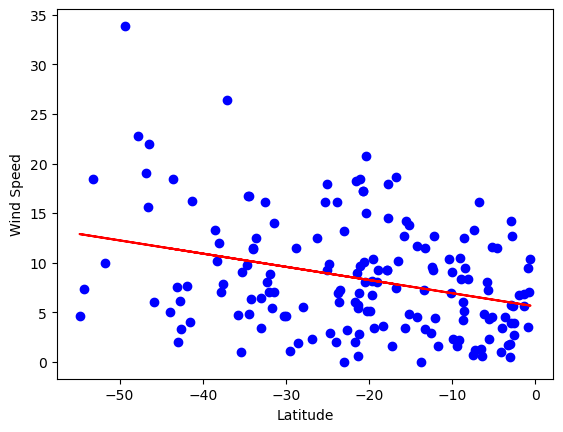

In [23]:
# Southern Hemisphere
x_southern = southern_hemi_df["Lat"]
y_southern = southern_hemi_df["Wind Speed"]
yl = "Wind Speed"
linear_regression_plot(x_southern, y_southern, yl)

### Relationship between Windspeed and Latitude:
There's no correlation between wind speed and latitude within the northern hemisphere.  There's a negative correlation between wind speed and latitude within the southern hemisphere.  